**Exercise 1**

In [33]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
world = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(world)

C:\Users\Němeček\AppData\Local\Temp\ipykernel_1888\1319399358.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.datasets.get_path('naturalearth_lowres')


In [35]:
gdf.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [36]:
gdf['gdp_pp'] = gdf['gdp_md_est'] / gdf['pop_est']

In [37]:
gdf.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_pp
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.006176
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.001089
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.001504
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0.046195
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.065298


In [38]:
gdf = gdf[~gdf['name'].isin(['Antarctica', 'Fr. S. Antarctic Lands'])]

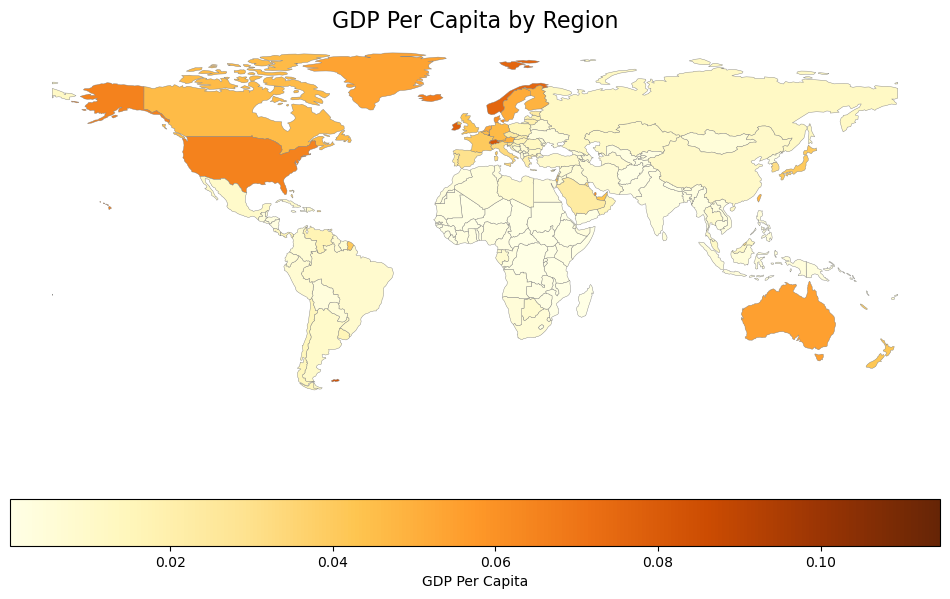

Reference System (CRS): EPSG:4326


In [39]:
ax = gdf.plot(
    column="gdp_pp",
    legend=True,
    cmap="YlOrBr",
    figsize=(12, 8),
    edgecolor="grey",
    linewidth=0.3,
    legend_kwds={"label": "GDP Per Capita",
                 "orientation": "horizontal"},
)
ax.set_title("GDP Per Capita by Region", fontsize=16)
ax.set_axis_off()
plt.show()
print("Reference System (CRS):", gdf.crs)

**Exercise 2**

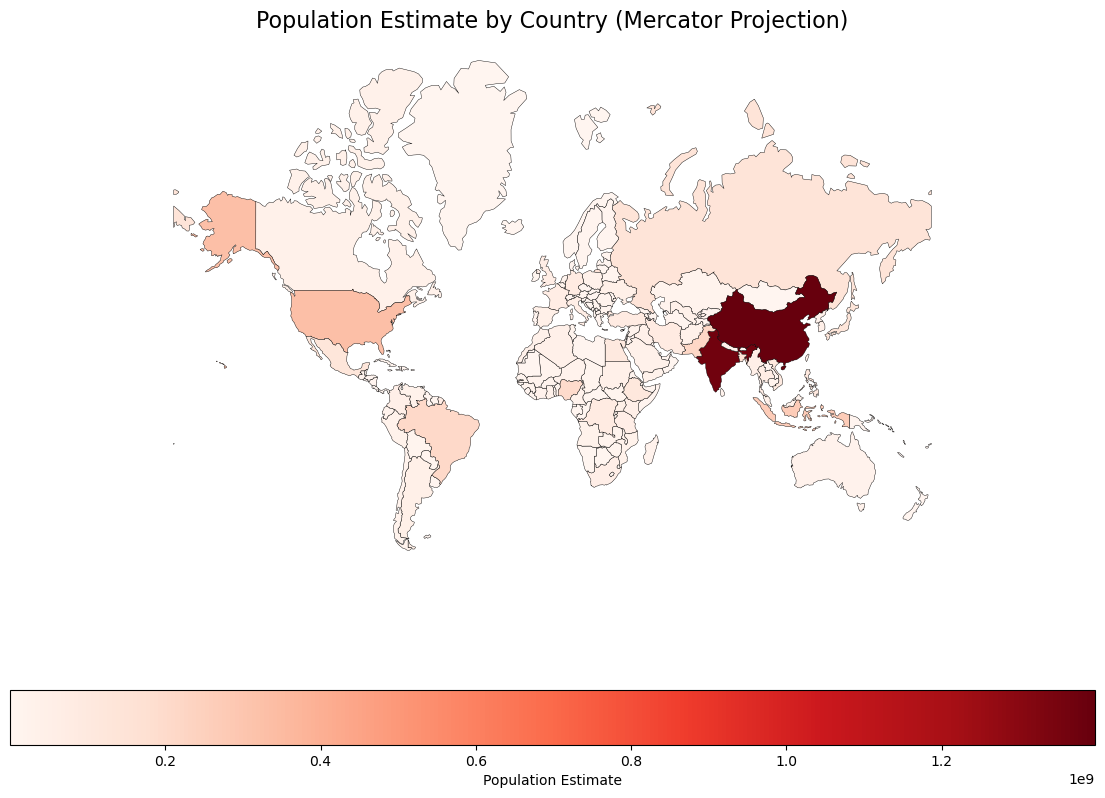

Reference System (CRS): EPSG:3857


In [40]:
# Change the reference system
gdf = gdf.to_crs(epsg=3857)

ax = gdf.plot(
    column="pop_est",
    legend=True,
    cmap="Reds",
    figsize=(14, 10),
    edgecolor="black",
    linewidth=0.3,
    legend_kwds={"label": "Population Estimate", "orientation": "horizontal"}
)
ax.set_title("Population Estimate by Country (Mercator Projection)", fontsize=16)
ax.set_axis_off()
plt.show()
print("Reference System (CRS):", gdf.crs)


In [41]:
gdf['area_m2'] = gdf.geometry.area

In [42]:
poland_area = gdf[gdf['name'] == 'Poland']['area_m2'].values[0]
print(f"The area of Poland is approximately {poland_area / 1e6:.2f} square kilometers.")

The area of Poland is approximately 824132.32 square kilometers.
